<a href="https://colab.research.google.com/github/mdellanina/TrabajoPracticoCODERHOUSE/blob/main/TrabajoPracticoCH_DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Proyecto final: "Modelo de Regresión para la Predicción de Nivel de Radiación Solar"


---




# 1   Introducción

El presente trabajo consiste en realizar un modelo de regresión capaz de predecir la radiación solar a partir de la medición de algunas variables climaticas. Para esto se cuenta con un conjunto de datos que contiene variables como: "dirección del viento", "velocidad del viento", "humedad" y "temperatura", ademas de las fechas y tiempos en que se hicieron dichas mediciones.

El dataSet utilizado contiene mediciones de 4 meses del año 2016 provistos por la NASA y para este trabajo se plantea, con las variables y mediciones disponibles, las siguientes hipotesis:

1.   La Radiación Solar esta relacionada directamente con el horario del dia en que se mida.
2.   La Radiación Solar esta relacionada directamente con la temperatura y Humedad.
3.   La Radiación Solar se ve afectada en alguna medida por el velocidad y dirección del viento.

El modelo final de predicción deberá utilizarse para determinar el nivel de radiación solar que tendremos a partir de medir solo estas variables.


---

Restricciones:

---


*   Se dispone de mediciones de un cuatrimestre del año, se debería explorar un año entero para tener las cuatro estaciones completas, por lo que solo será util para esa etapa del año.
*   No se disponen de datos de localización de las mediciones, no es lo mismo medir a nivel del mar que en altura, donde las demas variables se verían afectadas y las relaciones entre las mismas podrían cambiar.



---


Links de ref.:


---



https://www.kaggle.com/datasets/dronio/SolarEnergy/data

https://github.com/mdellanina/TrabajoPracticoCODERHOUSE








## 1.1 About DataSet

Estos conjuntos de datos son datos meteorológicos de la estación meteorológica HI-SEAS de cuatro meses (septiembre a diciembre de 2016) entre la Misión IV y la Misión V.

Para cada conjunto de datos, los campos son:

*   Un número de fila (1-n) útil para ordenar los resultados de esta exportación.
*   La fecha time_t de UNIX (segundos desde el 1 de enero de 1970). Útil para ordenar los resultados de esta exportación con los resultados de otras exportaciones
*   La fecha en formato aaaa-mm-dd
*   La hora local del día en formato hh:mm:ss de 24 horas.
*   Los datos numéricos, si los hay (puede ser una cadena vacía)
*   Los datos de texto, si los hay (puede ser una cadena vacía)

Las unidades de cada conjunto de datos son:

*   Radiación solar: w/m^2 (watts/metro^2)
*   Temperatura: °F (grados Fahrenheit)
*   Humedad: % (porcentaje)
*   Presión barométrica: Hg (pulgada de mercurio)
*   Dirección del viento: grados
*   Velocidad del viento: mph (millas por hora)
*   Amanecer/atardecer: hora de Hawái

## 1.2 Dependencias

In [36]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from seaborn import boxplot, histplot
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
from mpl_toolkits.mplot3d import Axes3D

####### EL siguiente código puede ser útil, usarlo con cuidado #######

### Configurar Pandas para mostrar todas las filas ###
#pd.set_option('display.max_rows', None)

### Configurar Pandas para mostrar todas las columnas ###
#pd.set_option('display.max_columns', None)

### Reset de pd.set_option('display.max_columns', None) ###
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

## 1.3 DataSet

In [37]:
path = "https://github.com/mdellanina/TrabajoPracticoCODERHOUSE/raw/main/SolarPrediction/SolarPrediction.csv"
df = pd.read_csv(path)
display(df)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


A este DataSet transformado en dataFrame, le haremos algunas modificaciones ya que vemos que es necesario acomodar los datos para que se puedan analizar mejor. Las modificaciones propuestas son las siguientes:

*   El Campo "Data" se ajusta solo a la fecha, se sacará la hora, ya que ese dato esta en el campo "Time"
*   El campo UNIXTime se elimina, ya que es redundante (Solo es una ref de fecha global)
*   El Campo "Data" estaba en formato dateTime y se cambia a Object para que la tome como categorica.
*   Agregar una columna nueva con un string diferente representando los 4 puntos cardinales principales, a partir de calcular si la variable "WindDirección(Degrees)" varia entre 4 diferentes rangos de angulos.
*   Reemplazar el valor de "Temperature" que esta medida en °F a °C (unidad de medida en Argentina)
*   Reemplazar el valor de "Speed" que esta medida en mph a km/h, y generar a partir de este valor actualizado, una variable categorica nueva con un string diferente representando los 5 denominaciones de vientos, a partir de calcular si la variable "Speed" varia entre 5 diferentes rangos de velocidades.



In [38]:
# El campo UNIXTime podria eliminarse, ya que es redundante (Solo es una ref de fecha global)
df = df.drop(['UNIXTime'], axis=1)
# El Campo "Data" estaba en formato dateTime y se cambia a Object para que la tome como categorica.
df['Data']=pd.to_datetime(df['Data'], format='%m/%d/%Y %I:%M:%S %p')
df['Data'] = df['Data'].astype(str)
# Agregamos una columna nueva con un string diferente representando los 4 puntos cardinales principales, a partir de calcular si la variable "WindDirección(Degrees)" varia entre 4 diferentes rangos de angulos.

def categorize_wind_direction(row):
    direction = row["WindDirection(Degrees)"]
    if (0 <= direction < 45) or (315 <= direction <= 360) :
        return "Norte"
    elif 45 < direction <= 135:
        return "Este"
    elif 135 < direction <= 225:
        return "Sur"
    else:
        return "Oeste"
df["WindDirectionCategory"] = df.apply(categorize_wind_direction, axis=1)
# reemplazar el valor de "Temperature" que esta medida en °F a °C
df['Temperature'] = (df['Temperature'] - 32) * 5/9
# reemplazar el valor de "Speed" que esta medida en mph a km/h
df['Speed'] = df['Speed'] * 1.609344

def categorize_wind_speed(row):
    speed = row["Speed"]
    if 1 <= speed <= 11:
        return "Brisa Suave"
    elif 11 < speed <= 28:
        return "Leve a moderado"
    elif 28 < speed <= 48:
        return "Regulares a Fuertes"
    elif 48 < speed <= 73:
        return "Muy Fuertes o Temporales"
    else:
        return "Temporal muy fuerte o Huracan"

df["WindSpeedCategory"] = df.apply(categorize_wind_speed, axis=1)
display(df)

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,WindDirectionCategory,WindSpeedCategory
0,2016-09-29,23:55:26,1.21,8.888889,30.46,59,177.39,9.044513,06:13:00,18:13:00,Sur,Brisa Suave
1,2016-09-29,23:50:23,1.21,8.888889,30.46,58,176.78,5.423489,06:13:00,18:13:00,Sur,Brisa Suave
2,2016-09-29,23:45:26,1.23,8.888889,30.46,57,158.75,5.423489,06:13:00,18:13:00,Sur,Brisa Suave
3,2016-09-29,23:40:21,1.21,8.888889,30.46,60,137.71,5.423489,06:13:00,18:13:00,Sur,Brisa Suave
4,2016-09-29,23:35:24,1.17,8.888889,30.46,62,104.95,9.044513,06:13:00,18:13:00,Este,Brisa Suave
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01,00:20:04,1.22,6.666667,30.43,102,145.42,10.863072,06:41:00,17:42:00,Sur,Brisa Suave
32682,2016-12-01,00:15:01,1.17,6.666667,30.42,102,117.78,10.863072,06:41:00,17:42:00,Este,Brisa Suave
32683,2016-12-01,00:10:01,1.20,6.666667,30.42,102,145.19,14.484096,06:41:00,17:42:00,Sur,Leve a moderado
32684,2016-12-01,00:05:02,1.23,6.666667,30.42,101,164.19,12.665537,06:41:00,17:42:00,Sur,Leve a moderado


# 2  Estadistica Descriptiva

## 2.1 Tamaño de la muestra

In [39]:
print("Este dataSet tiene la siguiente cantidad de filas y columnas: " + str(df.shape))

Este dataSet tiene la siguiente cantidad de filas y columnas: (32686, 12)


In [40]:
df['Data'] = df['Data'].astype(str)
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    32686 non-null  object 
 1   Time                    32686 non-null  object 
 2   Radiation               32686 non-null  float64
 3   Temperature             32686 non-null  float64
 4   Pressure                32686 non-null  float64
 5   Humidity                32686 non-null  int64  
 6   WindDirection(Degrees)  32686 non-null  float64
 7   Speed                   32686 non-null  float64
 8   TimeSunRise             32686 non-null  object 
 9   TimeSunSet              32686 non-null  object 
 10  WindDirectionCategory   32686 non-null  object 
 11  WindSpeedCategory       32686 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 3.0+ MB


,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,WindDirectionCategory,WindSpeedCategory
0,2016-09-29,23:55:26,1.21,8.888889,30.46,59,177.39,9.044513,06:13:00,18:13:00,Sur,Brisa Suave
1,2016-09-29,23:50:23,1.21,8.888889,30.46,58,176.78,5.423489,06:13:00,18:13:00,Sur,Brisa Suave
2,2016-09-29,23:45:26,1.23,8.888889,30.46,57,158.75,5.423489,06:13:00,18:13:00,Sur,Brisa Suave
3,2016-09-29,23:40:21,1.21,8.888889,30.46,60,137.71,5.423489,06:13:00,18:13:00,Sur,Brisa Suave
4,2016-09-29,23:35:24,1.17,8.888889,30.46,62,104.95,9.044513,06:13:00,18:13:00,Este,Brisa Suave
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01,00:20:04,1.22,6.666667,30.43,102,145.42,10.863072,06:41:00,17:42:00,Sur,Brisa Suave
32682,2016-12-01,00:15:01,1.17,6.666667,30.42,102,117.78,10.863072,06:41:00,17:42:00,Este,Brisa Suave
32683,2016-12-01,00:10:01,1.20,6.666667,30.42,102,145.19,14.484096,06:41:00,17:42:00,Sur,Leve a moderado
32684,2016-12-01,00:05:02,1.23,6.666667,30.42,101,164.19,12.665537,06:41:00,17:42:00,Sur,Leve a moderado


In [41]:
import random

df_null = df.copy()
def set_random_nulls(df_null, null_percentage):
# Calculate the number of null values to set
  num_nulls = int(df_null.size * null_percentage)
  print(num_nulls)
  print(df_null.index)
  # Get a random sample of indices
  null_indices = random.sample(range(df_null.index.stop), num_nulls)
  print(null_indices)
  # Set the values at the random indices to null
  df_null.iloc[null_indices] = np.nan

  return df_null

#Se transformaran en nulos, el 0.1% de los datos
df_null = set_random_nulls(df_null, 0.001)
print(df_null)


392
RangeIndex(start=0, stop=32686, step=1)
[12799, 11472, 4957, 15147, 10031, 11400, 18147, 24774, 27149, 14567, 32648, 32435, 3344, 15559, 25715, 27460, 1167, 15629, 20548, 20860, 9147, 2705, 15920, 7972, 16770, 25045, 18324, 19244, 2023, 5656, 30805, 31737, 5048, 3384, 19525, 14763, 17470, 25222, 14049, 17191, 24943, 1961, 27472, 25426, 16352, 23936, 10290, 1678, 27169, 3139, 1313, 157, 13997, 19020, 2151, 9130, 15145, 25751, 21, 27859, 19297, 22652, 22172, 14060, 5306, 15626, 17114, 22003, 8956, 4372, 11340, 29849, 16536, 8054, 4830, 1846, 22616, 6088, 13741, 6407, 5058, 24787, 11703, 24370, 26006, 18620, 12179, 17996, 2332, 8821, 26791, 953, 31230, 6144, 11333, 6318, 15552, 30081, 22601, 26631, 5275, 1549, 29451, 8227, 15526, 21282, 23071, 20302, 28926, 12012, 9835, 9411, 1870, 6773, 31736, 29828, 21959, 10218, 25855, 26555, 18597, 10907, 24244, 12307, 6272, 10179, 26060, 1510, 4001, 31218, 30978, 14242, 3418, 12469, 6453, 17299, 17356, 19616, 4326, 15136, 6699, 2089, 21013, 22033

El dataset obtenido de la base de datos posee 32686 filas y 12 columnas.

## 2.2 Integridad de Datos

In [42]:
print("****************************************")
print("Analisis de valores duplicados: ")
print("****************************************")
print(df_null.duplicated().value_counts())
if "df_null.duplicated().value_counts() == False":
  print("\n***** Hay datos duplicados *****")
  df_null.duplicated().info()
else:
  print("\n***** No hay datos duplicados *****")
print("\n****************************************")
print("Analisis de existencia de valores nulos: ")
print("****************************************")
df_null.info(verbose = True)
if "df_null.isna().value_counts() < (df_null.index)":
  print("\n***** Hay valores nulos *****\n")
else:
  print("\n***** No hay valores nulos *****\n")

****************************************
Analisis de valores duplicados: 
****************************************
False    32295
True       391
Name: count, dtype: int64

***** Hay datos duplicados *****
<class 'pandas.core.series.Series'>
RangeIndex: 32686 entries, 0 to 32685
Series name: None
Non-Null Count  Dtype
--------------  -----
32686 non-null  bool 
dtypes: bool(1)
memory usage: 32.0 KB

****************************************
Analisis de existencia de valores nulos: 
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    32294 non-null  object 
 1   Time                    32294 non-null  object 
 2   Radiation               32294 non-null  float64
 3   Temperature             32294 non-null  float64
 4   Pressure                32294 non-null  fl

**Se detecta entonces 391 datos faltantes/nulos.**

Se desarrolla entonces una funcion para completar datos nulos, en el caso de los numericos, con la media de los 5 datos anteriores y los 5 posteriores. Para el caso de los no-numericos, para conservar formato se replica dato, si 1 antes y uno despúes son iguales (ejemplo: dia)

In [43]:
# prompt: poner en los valores nulos el valor inmediato anterior en la lista?

df_null = df_null.fillna(method='ffill')


## 2.3 Analisis de variables numéricas y categóricas

Nos traemos la matriz actualizada y comenzamos con un describe() para empezar el analisis de los datos.

In [44]:
df_null.isna().sum()

Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
WindDirectionCategory     0
WindSpeedCategory         0
dtype: int64

In [45]:
df=df_null
df.info()
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    32686 non-null  object 
 1   Time                    32686 non-null  object 
 2   Radiation               32686 non-null  float64
 3   Temperature             32686 non-null  float64
 4   Pressure                32686 non-null  float64
 5   Humidity                32686 non-null  float64
 6   WindDirection(Degrees)  32686 non-null  float64
 7   Speed                   32686 non-null  float64
 8   TimeSunRise             32686 non-null  object 
 9   TimeSunSet              32686 non-null  object 
 10  WindDirectionCategory   32686 non-null  object 
 11  WindSpeedCategory       32686 non-null  object 
dtypes: float64(6), object(6)
memory usage: 3.0+ MB


,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.00,32686.00,32686.00,32686.00,32686.00,32686.00
mean,207.22,10.61,30.42,75.02,143.50,10.05
std,316.08,3.44,0.05,25.99,83.15,5.62
min,1.11,1.11,30.19,8.00,0.09,0.00
25%,1.23,7.78,30.40,56.00,82.25,5.42
50%,2.66,10.00,30.43,85.00,147.68,9.04
75%,354.51,12.78,30.46,97.00,179.31,12.67
max,1601.26,21.67,30.56,103.00,359.95,65.18


Detectamos aqui que hay valores de Humedad que sobrepasan el 100%, por lo que se procede a reemplazar estos valores por su maximo posible que es 100%

In [46]:
# prompt: mostrar los valores de la columna Humedad mayores de 100

df[df['Humidity'] > 100]

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,WindDirectionCategory,WindSpeedCategory
1699,2016-09-23,22:20:24,1.26,11.666667,30.49,101.0,122.91,1.802465,06:12:00,18:18:00,Este,Brisa Suave
1700,2016-09-23,22:15:22,1.26,11.666667,30.49,101.0,124.99,1.802465,06:12:00,18:18:00,Este,Brisa Suave
1701,2016-09-23,22:10:20,1.26,11.666667,30.49,101.0,111.26,1.802465,06:12:00,18:18:00,Este,Brisa Suave
1702,2016-09-23,22:05:21,1.22,12.222222,30.49,101.0,95.18,0.000000,06:12:00,18:18:00,Este,Temporal muy fuerte o Huracan
1703,2016-09-23,22:00:23,1.24,12.222222,30.49,101.0,144.83,3.621024,06:12:00,18:18:00,Sur,Brisa Suave
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01,00:20:04,1.22,6.666667,30.43,102.0,145.42,10.863072,06:41:00,17:42:00,Sur,Brisa Suave
32682,2016-12-01,00:15:01,1.17,6.666667,30.42,102.0,117.78,10.863072,06:41:00,17:42:00,Este,Brisa Suave
32683,2016-12-01,00:10:01,1.20,6.666667,30.42,102.0,145.19,14.484096,06:41:00,17:42:00,Sur,Leve a moderado
32684,2016-12-01,00:05:02,1.23,6.666667,30.42,101.0,164.19,12.665537,06:41:00,17:42:00,Sur,Leve a moderado


In [47]:
#Procedemos a reemplazar valores mayores a 100, por el valor maximo posible que es 100%
df['Humidity'] = np.where(df['Humidity'] > 100, 100, df['Humidity'])
df[df['Humidity'] > 100]

,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,WindDirectionCategory,WindSpeedCategory


Generamos nuevos "describe" tanto para las variables cualitativas como las cuantitativas

In [49]:
df.describe().round(2)

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.00,32686.00,32686.00,32686.00,32686.00,32686.00
mean,207.22,10.61,30.42,74.81,143.50,10.05
std,316.08,3.44,0.05,25.78,83.15,5.62
min,1.11,1.11,30.19,8.00,0.09,0.00
25%,1.23,7.78,30.40,56.00,82.25,5.42
50%,2.66,10.00,30.43,85.00,147.68,9.04
75%,354.51,12.78,30.46,97.00,179.31,12.67
max,1601.26,21.67,30.56,100.00,359.95,65.18


In [89]:
df.describe(include = 'object')

,Data,Time,TimeSunRise,TimeSunSet,WindDirectionCategory,WindSpeedCategory
count,32686,32686,32686,32686,32686,32686
unique,118,8266,51,56,4,5
top,2016-12-01,16:20:18,06:11:00,17:42:00,Sur,Brisa Suave
freq,288,24,1399,3682,14482,21437


# 3   Analisis Exploratorio de Datos (EDA)

## 3.1 Datos Erroneos o Corruptos

No hay datos erroneos ni corruptos, ya que hemos ejercitado esa parte "rompiendo" el dataset y volviendo a restaurarlo para continuar.

## 3.2 Analisis de variables numéricas

**FALTA:**
poner lo de abajo de todo
hacer mismo analisis con texto que en el agrupado, con descripcion.

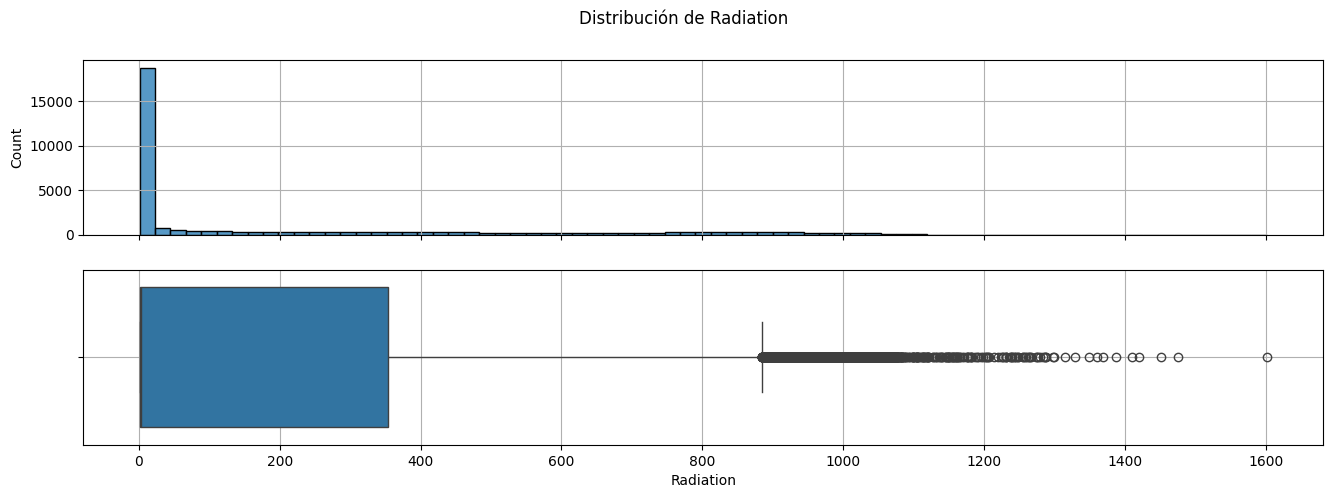

In [162]:
#vars = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
#for _, factores in enumerate(vars):
fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)
fig.suptitle(f'Distribución de Radiation')
sns.histplot(data=df, x = 'Radiation', ax = axes[0])
sns.boxplot (x = df['Radiation'], ax = axes[1])
axes[0].grid()
axes[1].grid()
plt.show()



Radiation


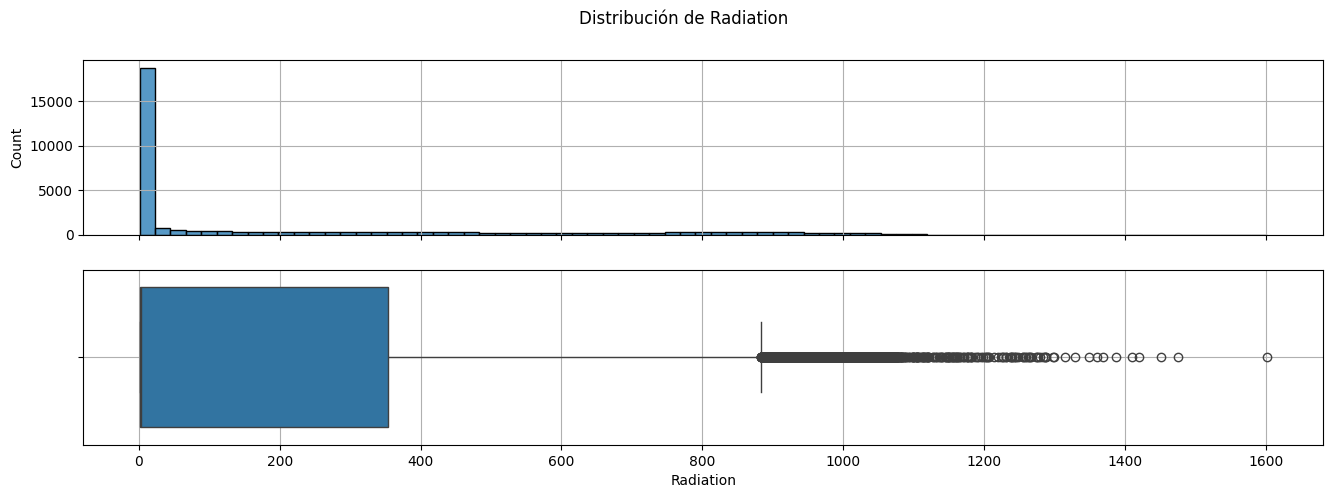

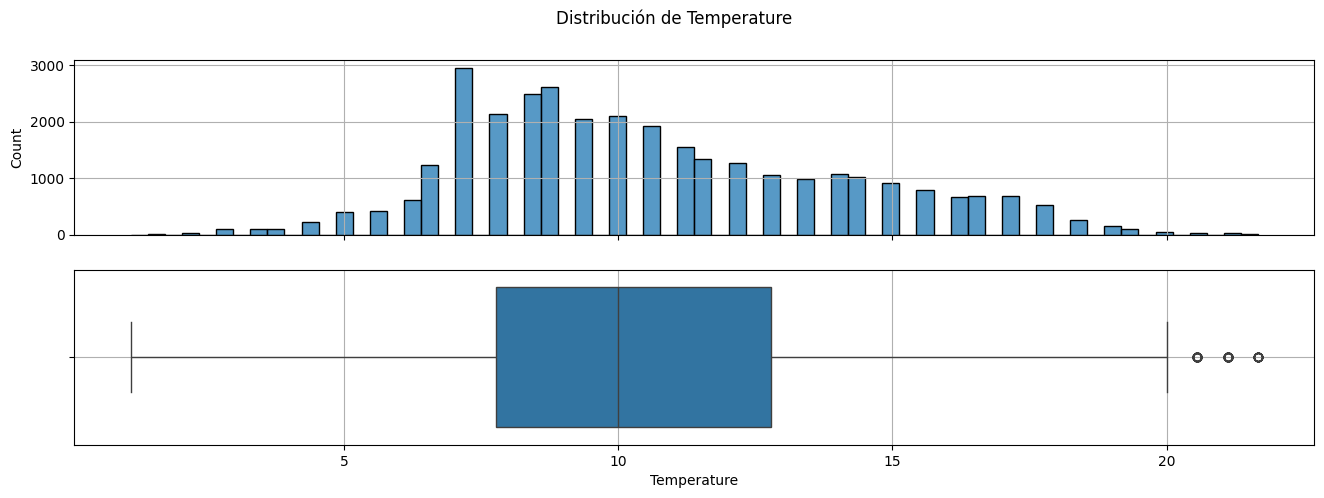

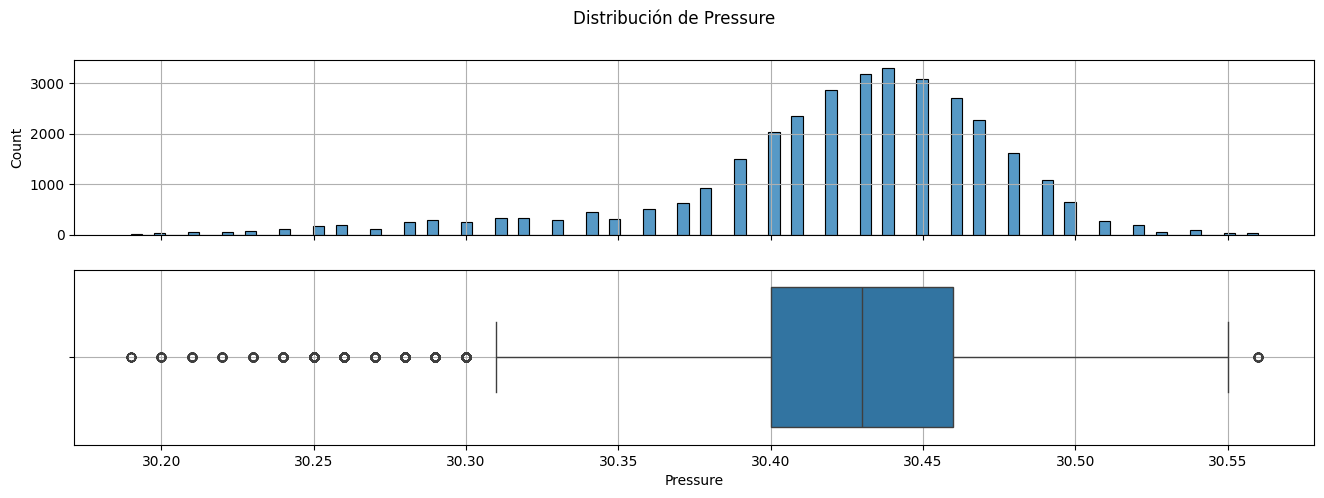

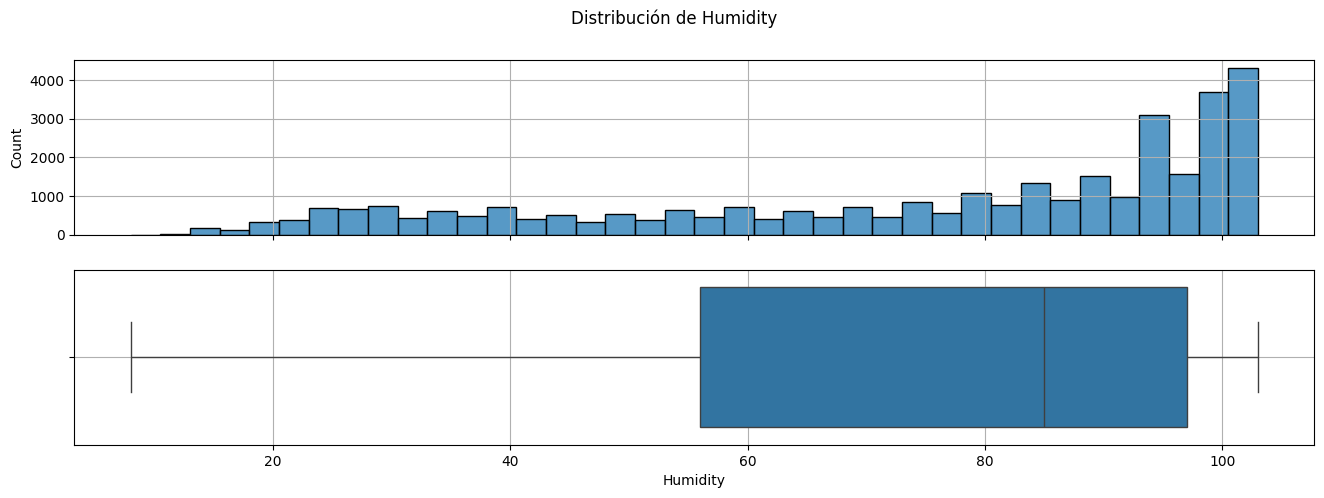

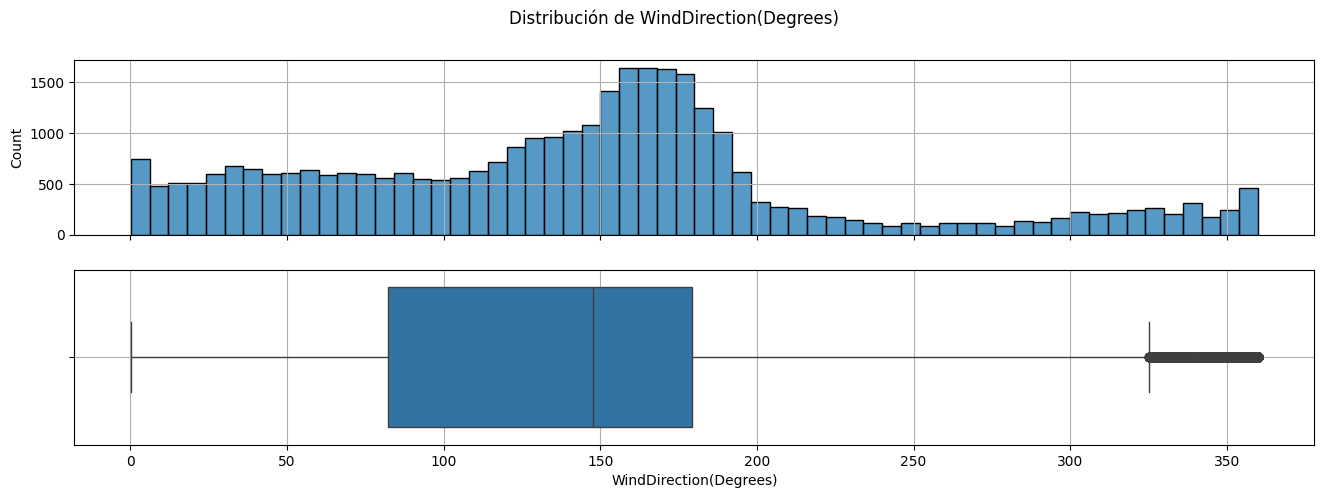

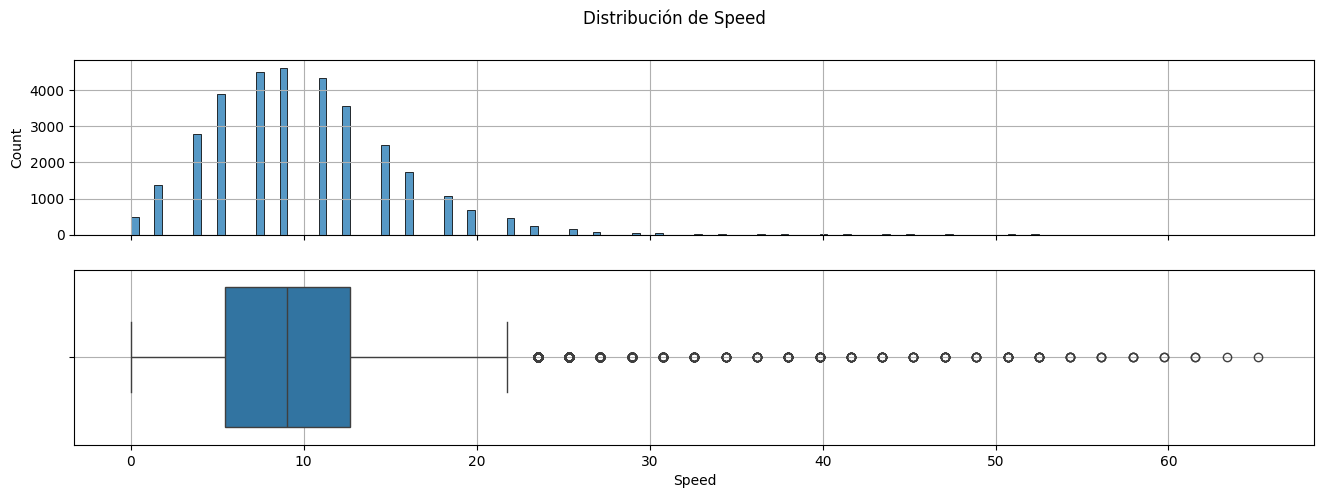

In [183]:
vars = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
for _, factores in enumerate(vars):
    fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)
    fig.suptitle(f'Distribución de {factores}')
    sns.histplot(data=df, x = factores, ax = axes[0])
    sns.boxplot (x = df[factores], ax = axes[1])
    axes[0].grid()
    axes[1].grid()
    plt.show()

           Data  Radiation
0    2016-09-01    1073.71
1    2016-09-02    1062.01
2    2016-09-03    1088.09
3    2016-09-04    1601.26
4    2016-09-05    1264.07
..          ...        ...
113  2016-12-27     870.52
114  2016-12-28    1157.27
115  2016-12-29     696.30
116  2016-12-30     439.43
117  2016-12-31    1026.34

[118 rows x 2 columns]


<ipython-input-102-27294e4d5874>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45)


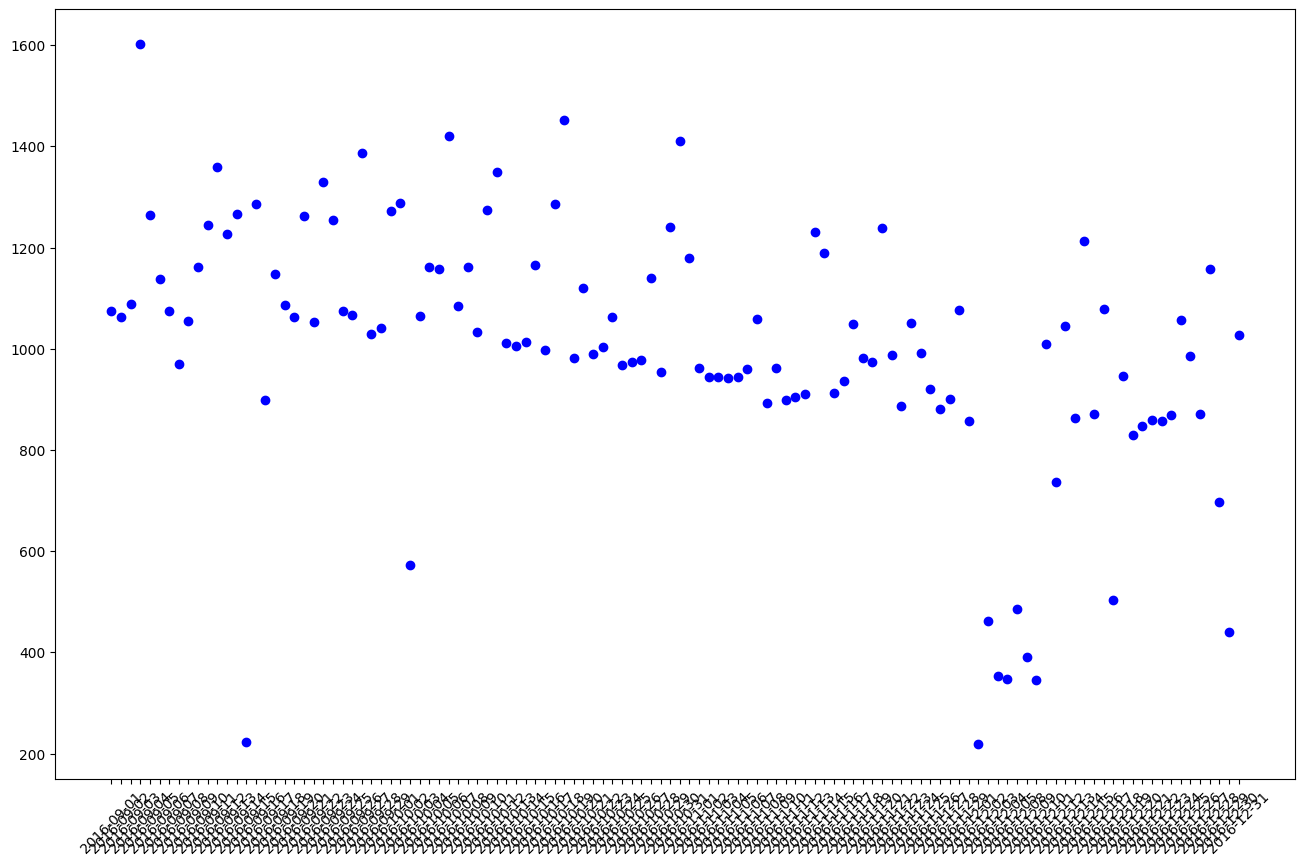

In [102]:
# Agrupamiento de datos de un mismo día, y tomar el maximo de la variable "Radiation" dentro de ese mismo dia
df_grouped = df.groupby('Data')['Radiation'].max().reset_index()
print(df_grouped)

x = df_grouped.Data
y = df_grouped.Radiation

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plot the data
ax.plot(x, y, 'bo')

# Set the tick labels to be rotated 45 degrees
ax.set_xticklabels(x, rotation=45)
plt.show()


## 3.3 Analisis de variables (Agrupadas por día)

En esta sección, agrupamos los datos por día, con la siguiente selección de dato para cada variable:
      
*   Radiación = Valor Máximo del Día.
*   Temperatura = Valor Máximo del Día.
*   Presión = Valor medio
*   Humedad = Valor Medio
*   Dirección del Viento (Categ.) = Moda del día
*   Velocidad del Viento (Categ.) = Moda del día



In [164]:
# Agrupamiento de datos por dia, y generación de df alternativo para el análisis (df_grouped):
df_grouped = df.groupby('Data')['Radiation'].max().reset_index()
df_grouped['Temperature'] = df.groupby('Data')['Temperature'].max().round(2).reset_index()['Temperature']
df_grouped['Pressure'] = df.groupby('Data')['Pressure'].mean().round(2).reset_index()['Pressure']
df_grouped['Humidity'] = df.groupby('Data')['Humidity'].mean().round(2).reset_index()['Humidity']
df_grouped['WindDirectionCategory'] = df.groupby('Data')['WindDirectionCategory'].agg(pd.Series.mode).reset_index()['WindDirectionCategory']
df_grouped['WindSpeedCategory'] = df.groupby('Data')['WindSpeedCategory'].agg(pd.Series.mode).reset_index()['WindSpeedCategory']
# Descripción de los datos:
df_grouped.describe().round(2)

,Radiation,Temperature,Pressure,Humidity
count,118.00,118.00,118.00,118.00
mean,1002.68,15.46,30.42,75.19
std,252.17,3.08,0.05,20.69
min,218.09,7.22,30.23,23.44
25%,911.78,13.33,30.40,62.50
50%,1019.42,15.56,30.43,80.84
75%,1157.51,17.78,30.45,93.00
max,1601.26,21.67,30.51,99.56


In [165]:
df_grouped.describe(include = 'object')

,Data,WindDirectionCategory,WindSpeedCategory
count,118,118,118
unique,118,4,3
top,2016-09-01,Sur,Brisa Suave
freq,1,75,99


En el caso de las variables numéricas, podemos ver del analisis descriptivo lo siguiente:

1.   La **RADIACIÓN** promedio es de 1002.68 w/m^2 y Q1-Q3 se encuantran entre 911.78w/m^2 y 1157.51w/m^2. Su valores máximo y mínimo fue de 1601.26 w/m^2 y 218.09 w/m^2 respectivamente.
2.   La **TEMPERATURA** promedio es 15.46°C y Q1-Q3 se encuantran entre 13.33°C y 17.78°C. Su valores máximo y minimo fue de 21.67°C y 7.22°C respectivamente.
3.   La **PRESIÓN** promedio es 30.42mhg y Q1-Q3 se encuantran entre 30.40mhg y 30.45mhg. Su valores máximo y minimo fue de 30.51mhg y 30.23mhg respectivamente.
4.   La **HUMEDAD** promedio es 75.19% y Q1-Q3 se encuantran entre 93% y 62.5%. Su valores máximo y minimo fue de 99.56% y 23.44% respectivamente.


En el caso de las variables categoricas de dirección y velocidad del viento que vemos a continuación, se puede observar lo siguiente:

1.   **EL VIENTO SUR** es mas preponderante durante casi el 64% de los días medidos.
2.   **Las BRISAS SUAVES** en cuanto a su velocidad es mas preponderante durante casi el 84% de los días medidos, ademas de que solo son relevantes tres categorias de viento en lugar de las 5 que hay en el dataSet completo.

En ambos casos se puede observar la alta frecuencia de dichos valores respecto al total.

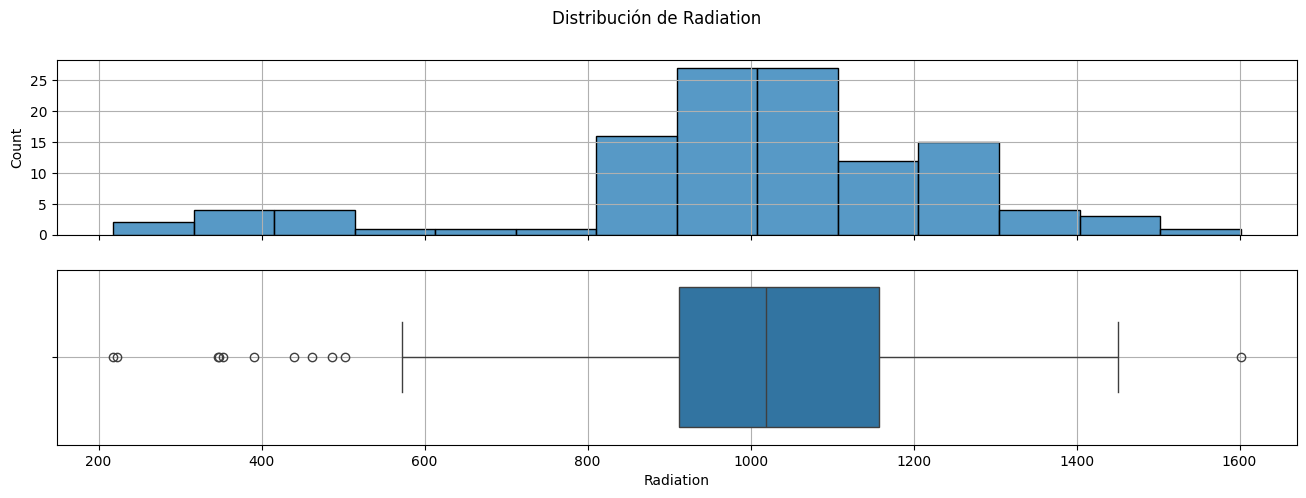

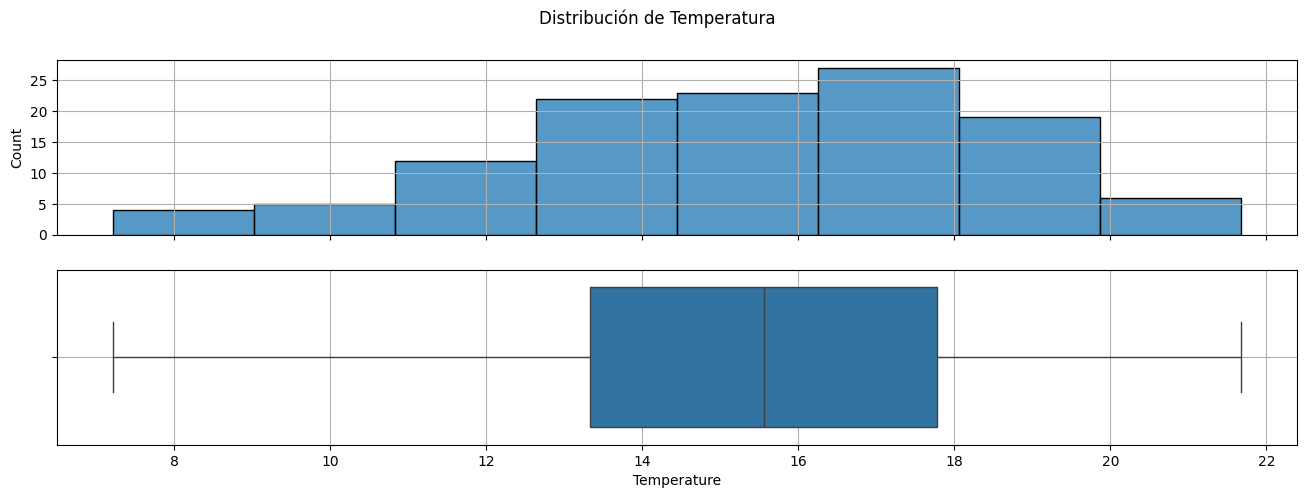

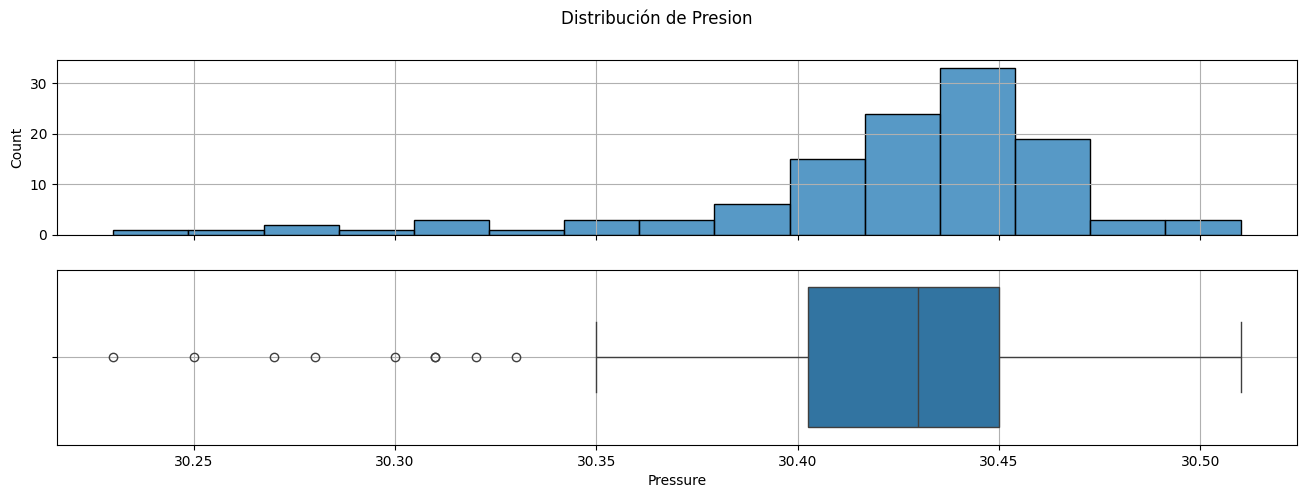

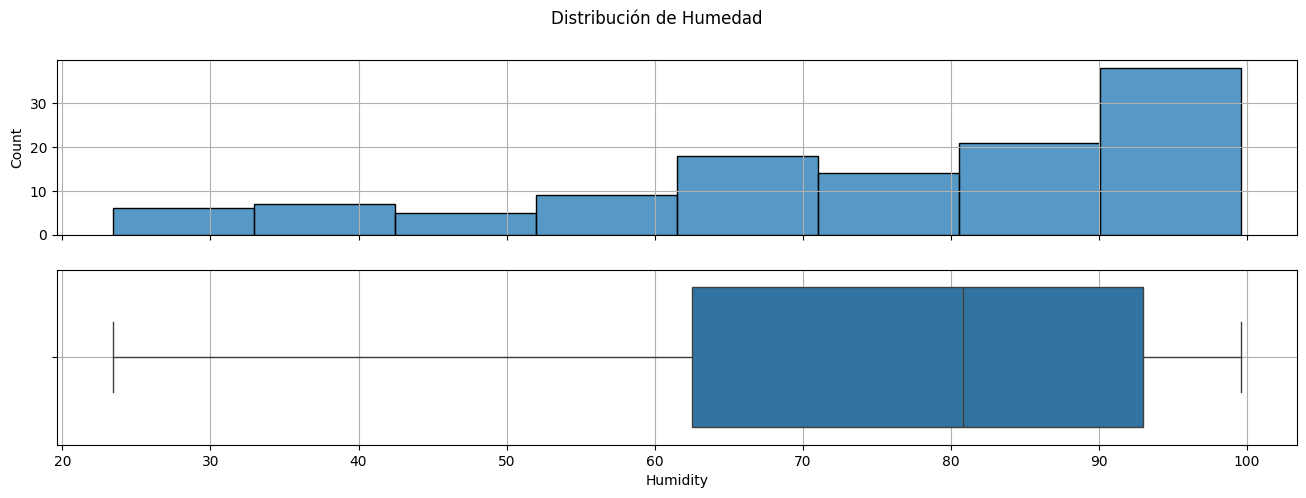

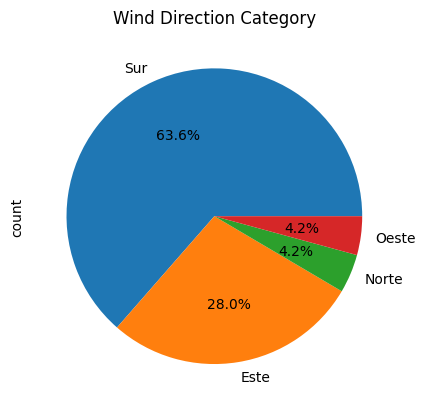

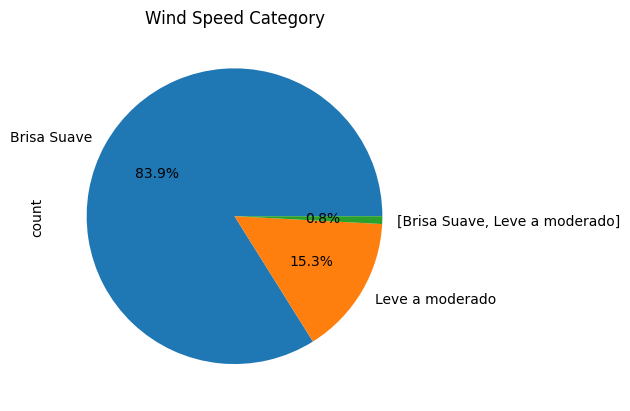

In [167]:
fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)
fig.suptitle(f'Distribución de Radiation')
sns.histplot(data=df_grouped, x = 'Radiation', ax = axes[0])
sns.boxplot (x = df_grouped['Radiation'], ax = axes[1])
axes[0].grid()
axes[1].grid()
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)
fig.suptitle(f'Distribución de Temperatura')
sns.histplot(data=df_grouped, x = 'Temperature', ax = axes[0])
sns.boxplot (x = df_grouped['Temperature'], ax = axes[1])
axes[0].grid()
axes[1].grid()
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)
fig.suptitle(f'Distribución de Presion')
sns.histplot(data=df_grouped, x = 'Pressure', ax = axes[0])
sns.boxplot (x = df_grouped['Pressure'], ax = axes[1])
axes[0].grid()
axes[1].grid()
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)
fig.suptitle(f'Distribución de Humedad')
sns.histplot(data=df_grouped, x = 'Humidity', ax = axes[0])
sns.boxplot (x = df_grouped['Humidity'], ax = axes[1])
axes[0].grid()
axes[1].grid()
plt.show()

df_grouped['WindDirectionCategory'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Wind Direction Category')
plt.show()

df_grouped['WindSpeedCategory'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Wind Speed Category')
plt.show()


Ploteos pero del df completo, sin agrupamientos...ver donde ponerlo, si arriba o abajo...capaz mejor arriba con sus datos!!!

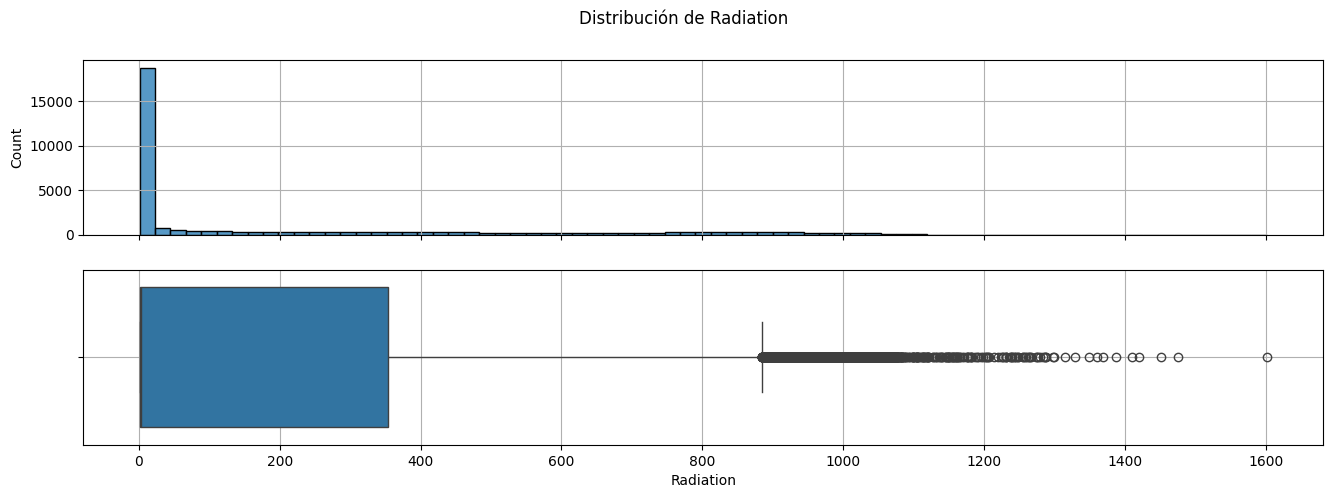

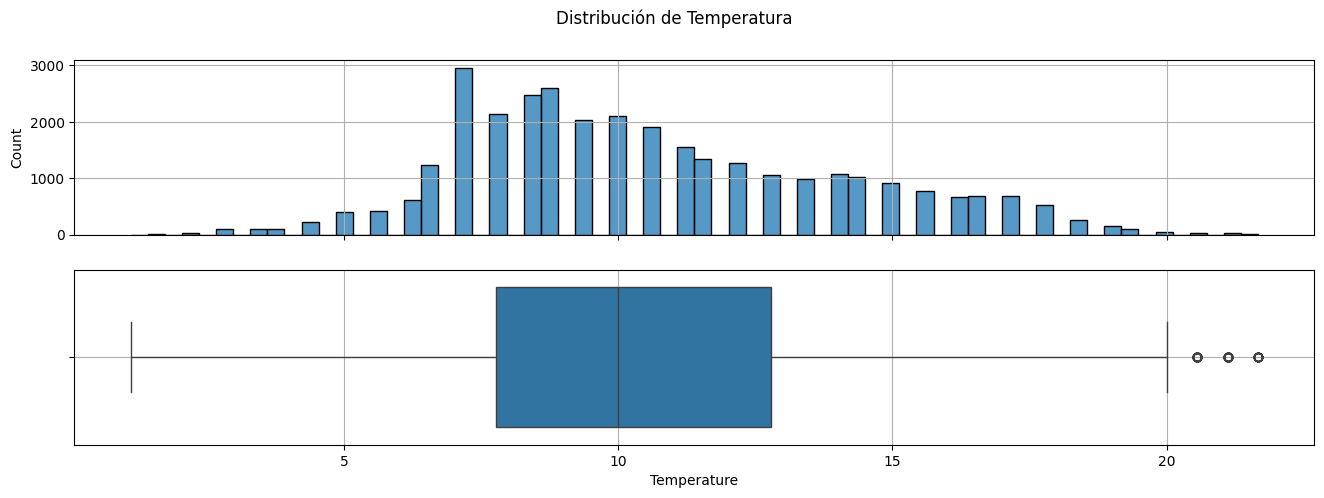

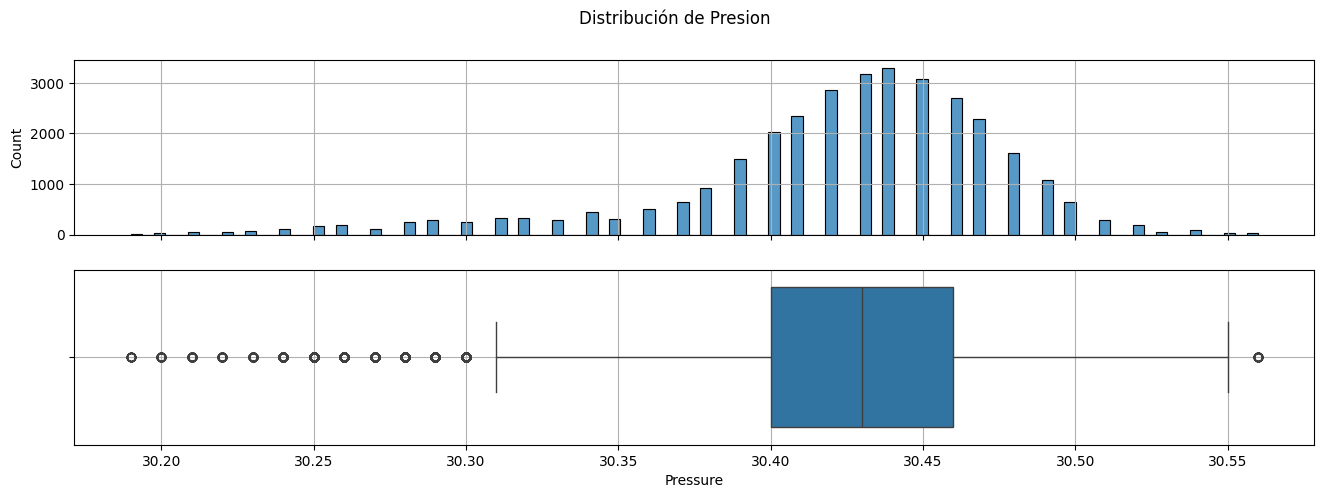

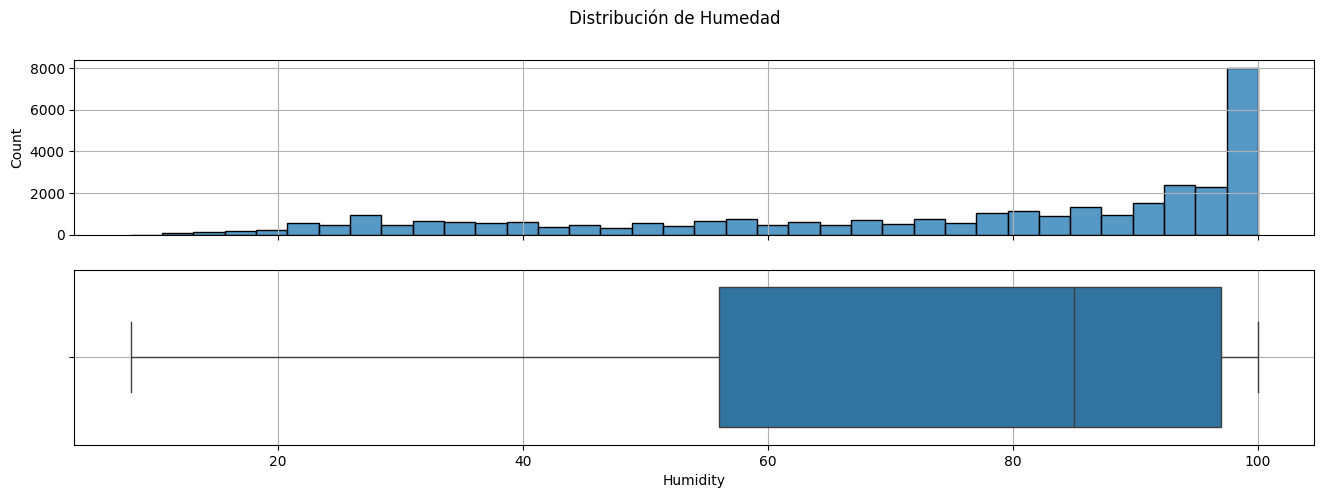

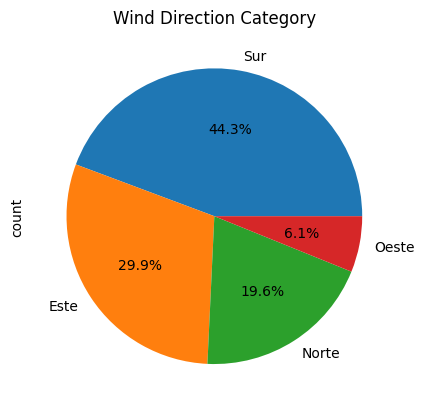

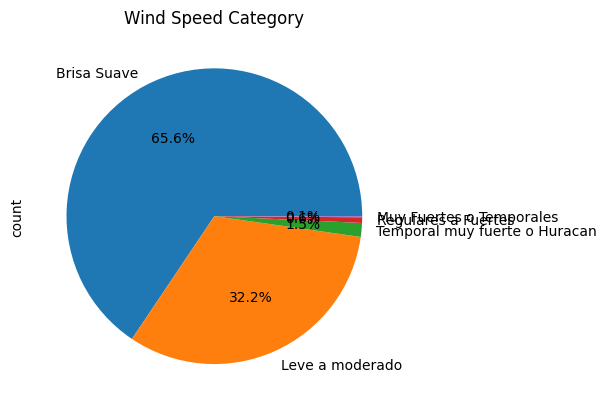

In [168]:
fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)
fig.suptitle(f'Distribución de Radiation')
sns.histplot(data=df, x = 'Radiation', ax = axes[0])
sns.boxplot (x = df['Radiation'], ax = axes[1])
axes[0].grid()
axes[1].grid()
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)
fig.suptitle(f'Distribución de Temperatura')
sns.histplot(data=df, x = 'Temperature', ax = axes[0])
sns.boxplot (x = df['Temperature'], ax = axes[1])
axes[0].grid()
axes[1].grid()
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)
fig.suptitle(f'Distribución de Presion')
sns.histplot(data=df, x = 'Pressure', ax = axes[0])
sns.boxplot (x = df['Pressure'], ax = axes[1])
axes[0].grid()
axes[1].grid()
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)
fig.suptitle(f'Distribución de Humedad')
sns.histplot(data=df, x = 'Humidity', ax = axes[0])
sns.boxplot (x = df['Humidity'], ax = axes[1])
axes[0].grid()
axes[1].grid()
plt.show()

df['WindDirectionCategory'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Wind Direction Category')
plt.show()

df['WindSpeedCategory'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Wind Speed Category')
plt.show()